#**R PROGRAMMING PROJECT : CAR MILEAGE PREDICTION**

In [ ]:
%load_ext rpy2.ipython

#Load the Data

In [ ]:
%%R
data <- read.csv("https://raw.githubusercontent.com/sannajohn/Car-Mileage-Prediction/main/car_details_v3.csv?token=GHSAT0AAAAAACI6APCD7LQIXKEWF2T37AUUZJQTNHA")
head(data)

                           name year selling_price km_driven   fuel seller_type
1        Maruti Swift Dzire VDI 2014        450000    145500 Diesel  Individual
2  Skoda Rapid 1.5 TDI Ambition 2014        370000    120000 Diesel  Individual
3      Honda City 2017-2020 EXi 2006        158000    140000 Petrol  Individual
4     Hyundai i20 Sportz Diesel 2010        225000    127000 Diesel  Individual
5        Maruti Swift VXI BSIII 2007        130000    120000 Petrol  Individual
6 Hyundai Xcent 1.2 VTVT E Plus 2017        440000     45000 Petrol  Individual
  transmission        owner    mileage  engine  max_power
1       Manual  First Owner  23.4 kmpl 1248 CC     74 bhp
2       Manual Second Owner 21.14 kmpl 1498 CC 103.52 bhp
3       Manual  Third Owner  17.7 kmpl 1497 CC     78 bhp
4       Manual  First Owner  23.0 kmpl 1396 CC     90 bhp
5       Manual  First Owner  16.1 kmpl 1298 CC   88.2 bhp
6       Manual  First Owner 20.14 kmpl 1197 CC  81.86 bhp
                    torque seats
1

#Structure of Data

In [ ]:
%%R
str(data)

'data.frame':	8128 obs. of  13 variables:
 $ name         : chr  "Maruti Swift Dzire VDI" "Skoda Rapid 1.5 TDI Ambition" "Honda City 2017-2020 EXi" "Hyundai i20 Sportz Diesel" ...
 $ year         : int  2014 2014 2006 2010 2007 2017 2007 2001 2011 2013 ...
 $ selling_price: int  450000 370000 158000 225000 130000 440000 96000 45000 350000 200000 ...
 $ km_driven    : int  145500 120000 140000 127000 120000 45000 175000 5000 90000 169000 ...
 $ fuel         : chr  "Diesel" "Diesel" "Petrol" "Diesel" ...
 $ seller_type  : chr  "Individual" "Individual" "Individual" "Individual" ...
 $ transmission : chr  "Manual" "Manual" "Manual" "Manual" ...
 $ owner        : chr  "First Owner" "Second Owner" "Third Owner" "First Owner" ...
 $ mileage      : chr  "23.4 kmpl" "21.14 kmpl" "17.7 kmpl" "23.0 kmpl" ...
 $ engine       : chr  "1248 CC" "1498 CC" "1497 CC" "1396 CC" ...
 $ max_power    : chr  "74 bhp" "103.52 bhp" "78 bhp" "90 bhp" ...
 $ torque       : chr  "190Nm@ 2000rpm" "250Nm@ 1500-250

#Installing Packages

In [ ]:
%%R
library("ggplot2") #to create visualizations of data for EDA
library("dplyr")   # Manipulation of Data
library("corrplot")
#install.packages("ggcorrplot")

Science: https://r4ds.had.co.nz/

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union






Error in library("ggcorrplot") : there is no package called ‘ggcorrplot’


In [ ]:
%%R
install.packages("reshape2") #for data manipulation and restructuring data frames
library(reshape2)


(as ‘lib’ is unspecified)



















	‘/tmp/RtmpVKyApc/downloaded_packages’



In [ ]:
%%R
install.packages("caret") #for various machine learning tasks(data processing, model training)
library(caret)

(as ‘lib’ is unspecified)

































































































































	‘/tmp/RtmpVKyApc/downloaded_packages’




# Data Cleaning and Processing

## Remove Incomplete Rows

In [ ]:
%%R
count(data)


     n
1 7907


In [ ]:
%%R
sum(is.na(data))


[1] 1


In [ ]:
%%R
row_status <- complete.cases(data)
data <- data[row_status,] # [row, column]
sum(is.na(data))

[1] 0


In [ ]:
%%R
count(data)

     n
1 7906


##Convert Engine Column from Character to Integer Vector

In [ ]:
%%R
str(data$engine)

 int [1:7906] 1248 1498 1497 1396 1298 1197 1061 796 1364 1399 ...


In [ ]:
%%R
engine_chr_values <- strsplit(data$engine, split = " ", fixed = TRUE)
engine_count <- length(engine_chr_values)
new_engine_values <- vector()

for (i in 1:engine_count) {
  new_engine_values[i] <- strtoi(engine_chr_values[[i]][1])
}

data$engine <- new_engine_values
str(data$engine)

  non-character argument




Error in strsplit(data$engine, split = " ", fixed = TRUE) : 
  non-character argument


## Convert Mileage Column from Character to Numeric Vector

In [ ]:
%%R
str(data$mileage)

 num [1:7906] 23.4 21.1 17.7 23 16.1 ...


In [ ]:
%%R
mileage_chr_values <- strsplit(data$mileage, split = " ", fixed = TRUE)
mileage_count <- length(mileage_chr_values)
new_mileage_values <- vector()

for (i in 1:mileage_count) {
  new_mileage_values[i] <- as.numeric(mileage_chr_values[[i]][1])
}

data$mileage <- new_mileage_values
str(data$mileage)

  non-character argument




Error in strsplit(data$mileage, split = " ", fixed = TRUE) : 
  non-character argument


##Convert Max Power Column from Character to Numeric Vector

In [ ]:
%%R
str(data$max_power)

 num [1:7906] 74 103.5 78 90 88.2 ...


In [ ]:
%%R
max_power_chr_values <- strsplit(data$max_power, split = " ", fixed = TRUE)
max_power_count <- length(max_power_chr_values)
new_max_power_values <- vector()

for (i in 1:max_power_count) {
  new_max_power_values[i] <- as.numeric(max_power_chr_values[[i]][1])
}

data$max_power <- new_max_power_values
str(data$max_power)

  non-character argument




Error in strsplit(data$max_power, split = " ", fixed = TRUE) : 
  non-character argument


##Data for Prediction

### Select Numeric Data

In [ ]:
%%R
pred_data <- data %>% select(selling_price, km_driven, owner, year, fuel, seller_type, transmission, mileage, engine)

###Calculate Age

In [ ]:
%%R
year_count <- length(pred_data$year)
age <- vector()

for (i in 1:year_count) {
  age[i] <- 2020 - pred_data$year[i]
}

pred_data <- cbind(pred_data, age)
str(pred_data$age)



 num [1:7906] 6 6 14 10 13 3 13 19 9 7 ...


In [ ]:
%%R
pred_data <- subset(pred_data, select = -year)
str(pred_data)

'data.frame':	7906 obs. of  9 variables:
 $ selling_price: int  450000 370000 158000 225000 130000 440000 96000 45000 350000 200000 ...
 $ km_driven    : int  145500 120000 140000 127000 120000 45000 175000 5000 90000 169000 ...
 $ owner        : chr  "First Owner" "Second Owner" "Third Owner" "First Owner" ...
 $ fuel         : chr  "Diesel" "Diesel" "Petrol" "Diesel" ...
 $ seller_type  : chr  "Individual" "Individual" "Individual" "Individual" ...
 $ transmission : chr  "Manual" "Manual" "Manual" "Manual" ...
 $ mileage      : num  23.4 21.1 17.7 23 16.1 ...
 $ engine       : int  1248 1498 1497 1396 1298 1197 1061 796 1364 1399 ...
 $ age          : num  6 6 14 10 13 3 13 19 9 7 ...


### Convert Fuel Types to Binary
1 = Petrol

0 = Diesel

In [ ]:
%%R
pred_data %>% count(fuel)

    fuel    n
1    CNG   52
2 Diesel 4299
3    LPG   35
4 Petrol 3520


In [ ]:
%%R
pred_fuel_count <- length(pred_data$fuel)

for (i in 1:pred_fuel_count) {
  temp_val <- trimws(pred_data$fuel[i])

  if(temp_val %in% "CNG") {
    pred_data <- pred_data[-c(i),]
  }
  else if(temp_val %in% "LPG") {
    pred_data <- pred_data[-c(i),]
  }
}

pred_data %>% count(fuel)


    fuel    n
1    CNG    2
2 Diesel 4299
3    LPG    1
4 Petrol 3520


In [ ]:
%%R
fuel_type <- vector() # 1 = Petrol, 0 = Diesel
pred_fuel_count <- length(pred_data$fuel)

for(i in 1:pred_fuel_count) {
  if(pred_data$fuel[i] %in% "Petrol") {
    fuel_type[i] <- 1
  }
  else {
    fuel_type[i] <- 0
  }
}

pred_data <- cbind(pred_data, fuel_type)
pred_data <- subset(pred_data, select = -fuel)

str(pred_data)

'data.frame':	7822 obs. of  9 variables:
 $ selling_price: int  450000 370000 158000 225000 130000 440000 45000 350000 200000 500000 ...
 $ km_driven    : int  145500 120000 140000 127000 120000 45000 5000 90000 169000 68000 ...
 $ owner        : chr  "First Owner" "Second Owner" "Third Owner" "First Owner" ...
 $ seller_type  : chr  "Individual" "Individual" "Individual" "Individual" ...
 $ transmission : chr  "Manual" "Manual" "Manual" "Manual" ...
 $ mileage      : num  23.4 21.1 17.7 23 16.1 ...
 $ engine       : int  1248 1498 1497 1396 1298 1197 796 1364 1399 1461 ...
 $ age          : num  6 6 14 10 13 3 19 9 7 6 ...
 $ fuel_type    : num  0 0 1 0 1 1 1 0 0 0 ...


###Convert Transmission Types to Binary
1 = Manual

0 = Automatic

In [ ]:
%%R
pred_data %>% count(transmission)

  transmission    n
1    Automatic 1041
2       Manual 6781


In [ ]:
%%R
transmission_type <- vector() # 1 = Manual, 0 = Automatic
transmission_count <- length(pred_data$transmission)

for(i in 1:transmission_count) {
  if(pred_data$transmission[i] %in% "Manual") {
    transmission_type[i] <- 1
  }
  else {
    transmission_type[i] <- 0
  }
}

pred_data <- cbind(pred_data, transmission_type)
pred_data <- subset(pred_data, select = -transmission)

str(pred_data)

'data.frame':	7822 obs. of  9 variables:
 $ selling_price    : int  450000 370000 158000 225000 130000 440000 45000 350000 200000 500000 ...
 $ km_driven        : int  145500 120000 140000 127000 120000 45000 5000 90000 169000 68000 ...
 $ owner            : chr  "First Owner" "Second Owner" "Third Owner" "First Owner" ...
 $ seller_type      : chr  "Individual" "Individual" "Individual" "Individual" ...
 $ mileage          : num  23.4 21.1 17.7 23 16.1 ...
 $ engine           : int  1248 1498 1497 1396 1298 1197 796 1364 1399 1461 ...
 $ age              : num  6 6 14 10 13 3 19 9 7 6 ...
 $ fuel_type        : num  0 0 1 0 1 1 1 0 0 0 ...
 $ transmission_type: num  1 1 1 1 1 1 1 1 1 1 ...


###Convert Seller Types to Binary

1 = Individual

0 = Dealer

In [ ]:
%%R
pred_data %>% count(seller_type)

       seller_type    n
1           Dealer 1106
2       Individual 6480
3 Trustmark Dealer  236


In [ ]:
%%R
seller_count <- length(pred_data$seller_type)

for (i in 1:seller_count) {
  temp_val <- trimws(pred_data$seller_type[i])

  if(temp_val %in% "Trustmark Dealer") {
    pred_data <- pred_data[-c(i),]
  }
}

pred_data %>% count(seller_type)

       seller_type    n
1           Dealer 1106
2       Individual 6480
3 Trustmark Dealer  100


In [ ]:
%%R
seller_type <- vector() # 1 = Individual, 0 = Dealer
seller_count <- length(pred_data$seller_type)

for(i in 1:seller_count) {
  if(pred_data$seller_type[i] %in% "Individual") {
    seller_type[i] <- 1
  }
  else {
    seller_type[i] <- 0
  }
}

pred_data <- subset(pred_data, select = -seller_type)
pred_data <- cbind(pred_data, seller_type)

str(pred_data)

'data.frame':	7686 obs. of  9 variables:
 $ selling_price    : int  450000 370000 158000 225000 130000 440000 45000 350000 200000 500000 ...
 $ km_driven        : int  145500 120000 140000 127000 120000 45000 5000 90000 169000 68000 ...
 $ owner            : chr  "First Owner" "Second Owner" "Third Owner" "First Owner" ...
 $ mileage          : num  23.4 21.1 17.7 23 16.1 ...
 $ engine           : int  1248 1498 1497 1396 1298 1197 796 1364 1399 1461 ...
 $ age              : num  6 6 14 10 13 3 19 9 7 6 ...
 $ fuel_type        : num  0 0 1 0 1 1 1 0 0 0 ...
 $ transmission_type: num  1 1 1 1 1 1 1 1 1 1 ...
 $ seller_type      : num  1 1 1 1 1 1 1 1 1 1 ...


### Convert Owner Types to Binary

1 = First Owner

0 = Second Owner

In [ ]:
%%R
pred_data %>% count(owner)

                 owner    n
1          First Owner 5034
2 Fourth & Above Owner  158
3         Second Owner 1984
4       Test Drive Car    5
5          Third Owner  505


In [ ]:
%%R
owner_count <- length(pred_data$owner)

for (i in 1:owner_count) {
  temp_val <- trimws(pred_data$owner[i])

  if(temp_val %in% "Fourth & Above Owner") {
    pred_data <- pred_data[-c(i),]
  }
  else if(temp_val %in% "Third Owner") {
    pred_data <- pred_data[-c(i),]
  }
  else if(temp_val %in% "Test Drive Car") {
    pred_data <- pred_data[-c(i),]
  }
}

pred_data %>% count(owner)

                 owner    n
1          First Owner 5034
2 Fourth & Above Owner   22
3         Second Owner 1984
4       Test Drive Car    1
5          Third Owner   54


In [ ]:
%%R
owner_type <- vector() # 1 = First Owner, 0 = Second Owner
owner_count <- length(pred_data$owner)

for(i in 1:owner_count) {
  if(pred_data$owner[i] %in% "First Owner") {
    owner_type[i] <- 1
  }
  else {
    owner_type[i] <- 0
  }
}

pred_data <- cbind(pred_data, owner_type)
pred_data <- subset(pred_data, select = -owner)

str(pred_data)

'data.frame':	7095 obs. of  9 variables:
 $ selling_price    : int  450000 370000 225000 130000 440000 45000 350000 200000 500000 92000 ...
 $ km_driven        : int  145500 120000 127000 120000 45000 5000 90000 169000 68000 100000 ...
 $ mileage          : num  23.4 21.1 23 16.1 20.1 ...
 $ engine           : int  1248 1498 1396 1298 1197 796 1364 1399 1461 993 ...
 $ age              : num  6 6 10 13 3 19 9 7 6 15 ...
 $ fuel_type        : num  0 0 0 1 1 1 0 0 0 1 ...
 $ transmission_type: num  1 1 1 1 1 1 1 1 1 1 ...
 $ seller_type      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ owner_type       : num  1 0 1 1 1 0 1 1 0 0 ...


# Visualising Data


## Histogram

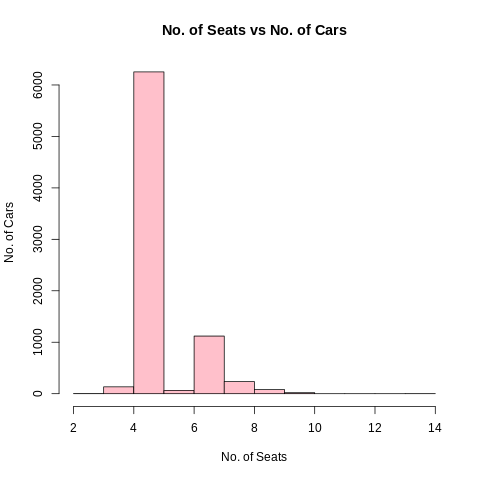

In [ ]:
%%R
hist(data$seats, main = "No. of Seats vs No. of Cars", xlab = "No. of Seats", ylab = "No. of Cars", col="pink", border="black")

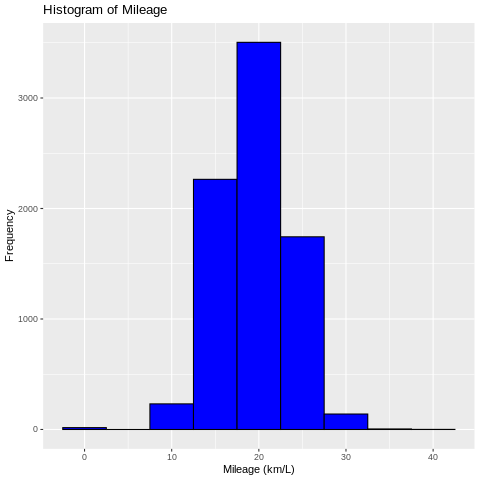

In [ ]:
%%R
ggplot(data, aes(x = mileage)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(
    x = "Mileage (km/L)",
    y = "Frequency",
    title = "Histogram of Mileage"
  )

## Box Plot

In [ ]:
%%R
library("magrittr")

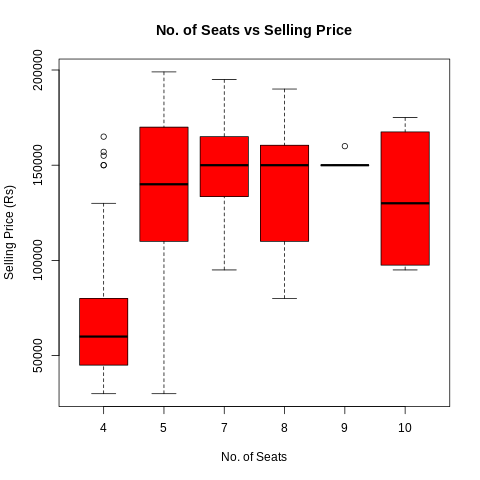

In [ ]:
%%R
temp_data <- data %>%
  select(selling_price, seats) %>%
  filter(selling_price < 200000)

boxplot(temp_data$selling_price ~ temp_data$seats, main = "No. of Seats vs Selling Price", xlab = "No. of Seats", ylab = "Selling Price (Rs)", col="red")

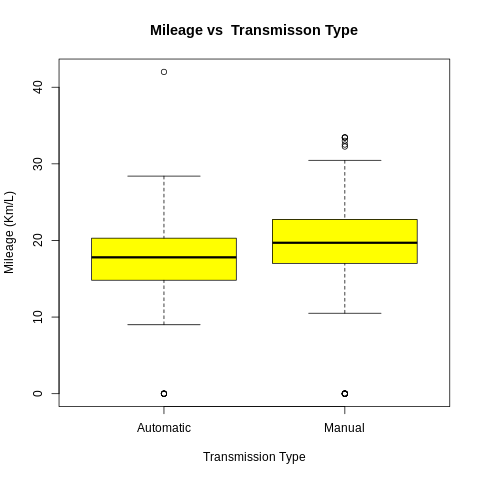

In [ ]:
%%R

boxplot(data$mileage ~ data$transmission, main = "Mileage vs  Transmisson Type", xlab = "Transmission Type", ylab = "Mileage (Km/L)", col="yellow")

## Pie Chart

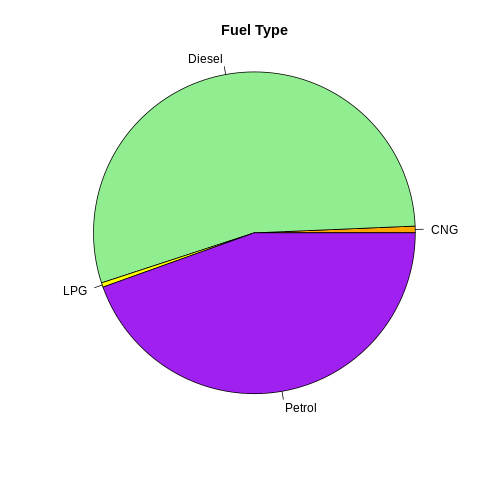

In [ ]:
%%R
fuel_count = data %>% count(fuel)
pie(fuel_count$n, labels = fuel_count$fuel, radius = 1, col = c("orange", "light green", "yellow", "purple"), main = "Fuel Type")

##Bar Plot

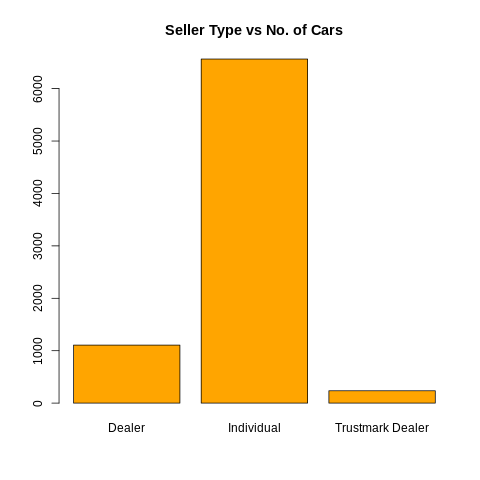

In [ ]:
%%R
barplot(table(data$seller_type), main = "Seller Type vs No. of Cars", col="Orange")

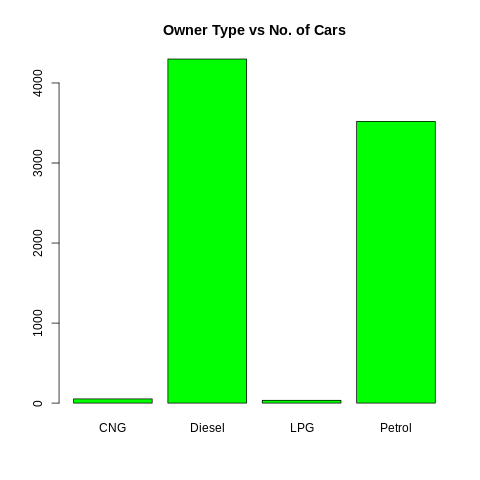

In [ ]:
%%R
barplot(table(data$fuel), main = "Owner Type vs No. of Cars", col="Green")

## Scatter Plot

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


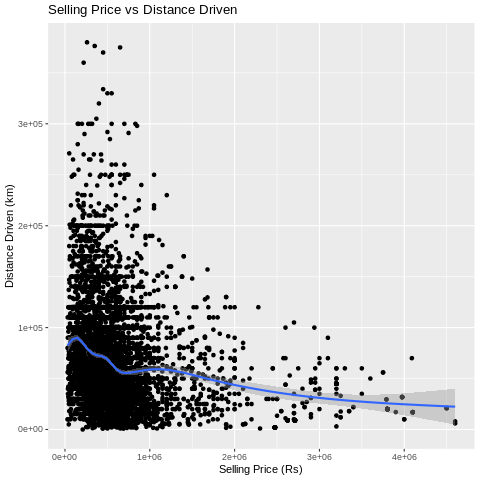

In [ ]:
%%R
graph_data_1 <- data %>%
  select(selling_price, km_driven) %>%
  filter(selling_price < 5000000, km_driven < 400000)

ggplot(graph_data_1, aes(x = selling_price, y = km_driven)) + geom_point() + geom_smooth() + labs(title = "Selling Price vs Distance Driven", x = "Selling Price (Rs)", y = "Distance Driven (km)")

## Bar Chart

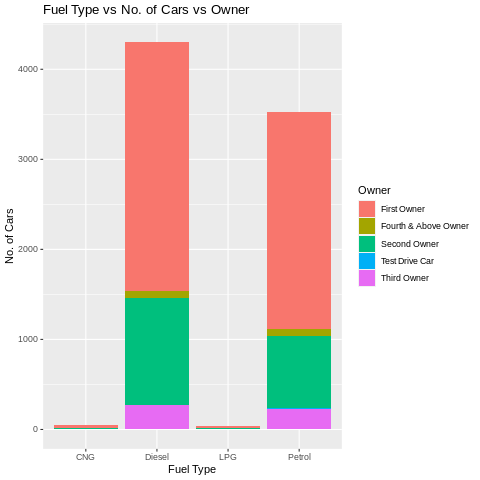

In [ ]:
%%R
ggplot(data, aes(x = fuel, fill = owner)) + geom_bar() + labs(title = "Fuel Type vs No. of Cars vs Owner", x = "Fuel Type", y = "No. of Cars", fill = "Owner")

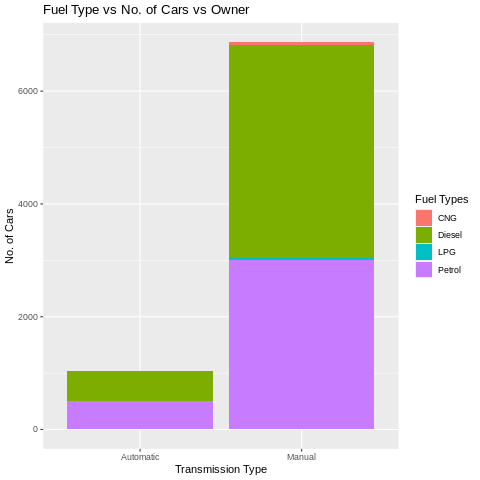

In [ ]:
%%R
ggplot(data, aes(x = transmission, fill = fuel)) + geom_bar() + labs(title = "Fuel Type vs No. of Cars vs Owner", x = "Transmission Type", y = "No. of Cars", fill = "Fuel Types")

##Correlation of Dataset

In [ ]:
%%R
cor=round(cor(pred_data), 1)  #calculation of correlation of the dataset rounded to 1 decimal point
cor

                  selling_price km_driven mileage engine  age fuel_type
selling_price               1.0      -0.2    -0.1    0.5 -0.4      -0.2
km_driven                  -0.2       1.0    -0.2    0.2  0.4      -0.3
mileage                    -0.1      -0.2     1.0   -0.6 -0.3      -0.1
engine                      0.5       0.2    -0.6    1.0  0.0      -0.5
age                        -0.4       0.4    -0.3    0.0  1.0       0.0
fuel_type                  -0.2      -0.3    -0.1   -0.5  0.0       1.0
transmission_type          -0.6       0.2     0.2   -0.3  0.2       0.0
seller_type                -0.4       0.2     0.0   -0.1  0.2       0.0
owner_type                  0.2      -0.3     0.1    0.0 -0.4       0.0
                  transmission_type seller_type owner_type
selling_price                  -0.6        -0.4        0.2
km_driven                       0.2         0.2       -0.3
mileage                         0.2         0.0        0.1
engine                         -0.3        -

##Correlation Heat Map

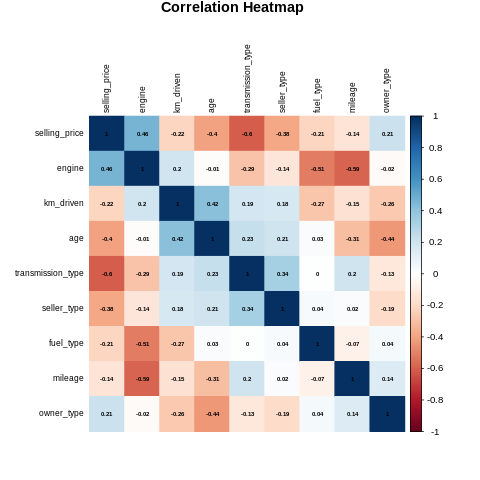

In [ ]:
%%R
#install.packages("corrplot")
library(corrplot)
correlation_matrix <- cor(as.matrix(pred_data))

# Create a correlation matrix plot
corrplot(
  correlation_matrix,
  method = "color",
  tl.cex = 0.7,
  title = "Correlation Heatmap",
  col.lab = "black",  # Label color
  tl.col = "black",  # Text color for labels
  addCoef.col = "black",  # Coefficient color
  number.cex = 0.5,  # Coefficient size
  number.digits = 2,  # Number of decimal places for coefficients
  order = "hclust",  # Optional clustering of rows and columns
  mar = c(1, 1, 1, 2)  # Adjust bottom margin to make space for x-axis labels
)



#Prediction

## Simple Linear Regression

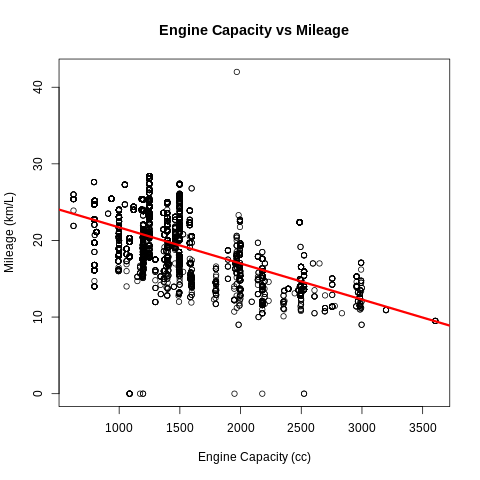

In [ ]:
%%R
plot(pred_data$engine, pred_data$mileage, xlab = "Engine Capacity (cc)", ylab = "Mileage (km/L)")
abline(lm(mileage ~ engine, data = pred_data), col = "red", lwd = 3)
title(main = "Engine Capacity vs Mileage")

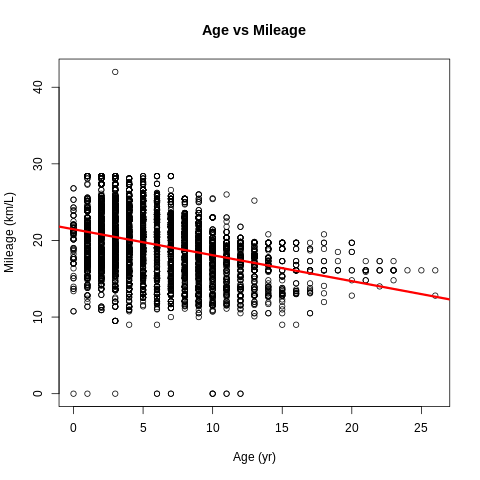

In [ ]:
%%R
plot(pred_data$age, pred_data$mileage, xlab = "Age (yr)", ylab = "Mileage (km/L)")
abline(lm(mileage ~ age, data = pred_data), col = "red", lwd = 3)
title(main = "Age vs Mileage")

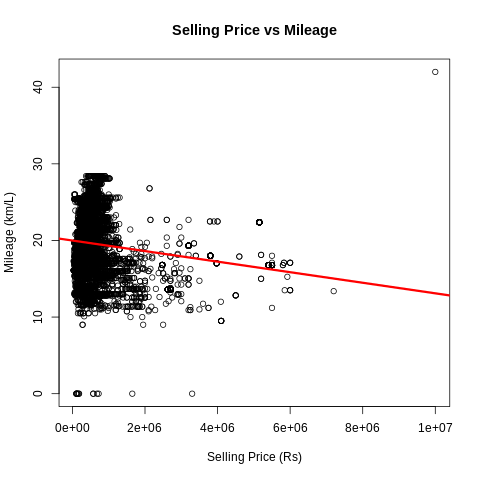

In [ ]:
%%R
plot(pred_data$selling_price, pred_data$mileage, xlab = "Selling Price (Rs)", ylab = "Mileage (km/L)")
abline(lm(mileage ~ selling_price, data = pred_data), col = "red", lwd = 3)
title(main = "Selling Price vs Mileage")

## Multiple Linear Regression

`geom_smooth()` using formula = 'y ~ x'


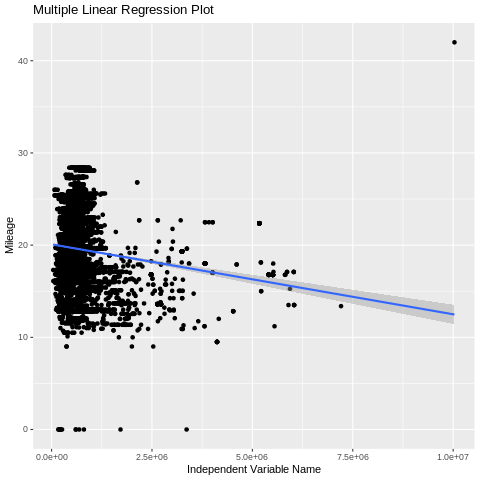

In [ ]:
%%R
ggplot(pred_data, aes(x = km_driven + owner_type + age + fuel_type + seller_type + transmission_type + selling_price + engine, y = mileage)) +
  geom_point() +  # Scatterplot points
  geom_smooth(method = "lm", se = TRUE) +  # Regression lines with confidence intervals
  labs(
    x = "Independent Variable Name",
    y = "Mileage",
    title = "Multiple Linear Regression Plot"
  )

##Training and Testing Data

In [ ]:
%%R
colnames(pred_data)

[1] "selling_price"     "km_driven"         "mileage"          
[4] "engine"            "age"               "fuel_type"        
[7] "transmission_type" "seller_type"       "owner_type"       


In [ ]:
%%R
#install.packages("caret")
#library(caret)
set.seed(123)  # Set a seed for reproducibility
train_indices <- createDataPartition(pred_data$mileage, p = 0.8, list = FALSE)

train_data <- pred_data[train_indices, ]
test_data <- pred_data[-train_indices, ]

In [ ]:
%%R
numerical_cols <- names(pred_data)[sapply(pred_data, is.numeric)]
numerical_cols

[1] "selling_price"     "km_driven"         "mileage"          
[4] "engine"            "age"               "fuel_type"        
[7] "transmission_type" "seller_type"       "owner_type"       


In [ ]:
%%R
str(pred_data)

'data.frame':	7095 obs. of  9 variables:
 $ selling_price    : num  450000 370000 225000 130000 440000 45000 350000 200000 500000 92000 ...
 $ km_driven        : num  145500 120000 127000 120000 45000 ...
 $ mileage          : num  23.4 21.1 23 16.1 20.1 ...
 $ engine           : num  1248 1498 1396 1298 1197 ...
 $ age              : num  6 6 10 13 3 19 9 7 6 15 ...
 $ fuel_type        : num  0 0 0 1 1 1 0 0 0 1 ...
 $ transmission_type: num  1 1 1 1 1 1 1 1 1 1 ...
 $ seller_type      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ owner_type       : num  1 0 1 1 1 0 1 1 0 0 ...


In [ ]:
%%R
pred_data$engine <- as.numeric(pred_data$engine)
pred_data$selling_price <- as.numeric(pred_data$selling_price)
pred_data$km_driven <- as.numeric(pred_data$km_driven)

In [ ]:
%%R
numerical_columns <- c('selling_price', 'km_driven', 'engine', 'age', 'fuel_type', 'transmission_type', 'seller_type', 'owner_type')

# Feature Scaling
train_data[numerical_columns] <- scale(train_data[numerical_columns])
test_data[numerical_columns] <- scale(test_data[numerical_columns])


In [ ]:
%%R
head(train_data)
head(test_data)

   selling_price   km_driven mileage      engine        age  fuel_type
13    -0.4854558  1.54503208   19.30 -0.42558151  1.5189751 -0.8836606
17     0.1280823  0.08877205   24.52 -0.42558151 -0.4416682 -0.8836606
21    -0.6160483  0.71288349   21.00  0.00520162  0.9587913 -0.8836606
30    -0.5162571 -0.84739512   16.80 -1.33973163 -1.0018520  1.1308582
37    -0.3795034 -1.05543226   23.95 -0.93119552 -1.2819439  1.1308582
42     1.7567920 -1.26346941   16.00 -0.18288679 -1.2819439  1.1308582
   transmission_type seller_type owner_type
13         0.3860096   0.4591101 -1.5975242
17         0.3860096   0.4591101 -1.5975242
21         0.3860096   0.4591101 -1.5975242
30         0.3860096   0.4591101  0.6255272
37         0.3860096   0.4591101  0.6255272
42        -2.5887820   0.4591101  0.6255272


##Simple Linear Regression Prediction

In [ ]:
%%R
# Fit a simple linear regression model
lm_model <- lm(mileage ~ selling_price, data = train_data)
# Make predictions on test data
sl_predictions <- predict(lm_model, newdata = test_data)


In [ ]:
%%R
summary(sl_predictions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.73   19.50   19.64   19.51   19.78   19.97 


In [ ]:
%%R
summary(lm(mileage ~ selling_price, data = pred_data))


Call:
lm(formula = mileage ~ selling_price, data = pred_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.9163  -2.7474  -0.0284   2.9168  28.9026 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.999e+01  6.081e-02   328.7   <2e-16 ***
selling_price -6.891e-07  5.647e-08   -12.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.985 on 7093 degrees of freedom
Multiple R-squared:  0.02057,	Adjusted R-squared:  0.02043 
F-statistic: 148.9 on 1 and 7093 DF,  p-value: < 2.2e-16



## Multiple Linear Regression Prediction


In [ ]:
%%R
# Fit a multiple linear regression model
mlr <- lm(mileage ~ km_driven + owner_type + age + fuel_type + seller_type + transmission_type + selling_price + engine, data = train_data)
# Make predictions on test data
ml_predictions <- predict(mlr, newdata = test_data)


In [ ]:
%%R
summary(ml_predictions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.575  17.996  20.028  19.514  21.677  26.518 


In [ ]:
%%R
summary(lm(mileage ~ km_driven + owner_type + age + fuel_type + seller_type + transmission_type + selling_price + engine, data = pred_data))


Call:
lm(formula = mileage ~ km_driven + owner_type + age + fuel_type + 
    seller_type + transmission_type + selling_price + engine, 
    data = pred_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3769  -1.4775  -0.0415   1.3982  25.2501 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.227e+01  2.092e-01 154.275  < 2e-16 ***
km_driven          9.679e-07  6.084e-07   1.591   0.1117    
owner_type         7.769e-02  7.234e-02   1.074   0.2828    
age               -3.223e-01  1.010e-02 -31.906  < 2e-16 ***
fuel_type         -3.935e+00  7.175e-02 -54.846  < 2e-16 ***
seller_type       -1.663e-01  8.607e-02  -1.932   0.0534 .  
transmission_type  7.578e-01  1.122e-01   6.754 1.55e-11 ***
selling_price      2.931e-07  5.269e-08   5.562 2.76e-08 ***
engine            -6.851e-03  7.796e-05 -87.884  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 7086 degre